In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
import warnings


In [40]:
df=pd.read_csv("C:\\Users\\sayan\Desktop\\FINAL\\diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [41]:
df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [42]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


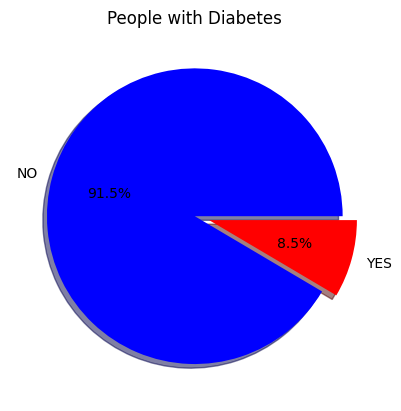

In [43]:
plt.pie(df.diabetes.value_counts(),[0,0.1],labels = ['NO','YES'],autopct ='%1.1f%%',shadow = True,colors = ['BLUE','RED'],)
plt.title('People with Diabetes')
plt.show()

In [44]:
df1 = df[df['diabetes'] == 1]

In [45]:
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [46]:
df2 = df[df['diabetes'] == 0]

In [47]:
df2 = df2.drop_duplicates()

In [50]:
df2.shape,df1.shape

((87664, 9), (8500, 9))

In [48]:
df = pd.concat([df1,df2])

In [51]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [52]:
le1 = LabelEncoder()
le2 = LabelEncoder()

In [53]:
df['gender'] = le1.fit_transform(df['gender'])
df['smoking_history'] = le2.fit_transform(df['smoking_history'])

smoking history:

4:never
5:not current
1: current
3: former
0: no info
2:ever

gender:
0:female
1:male



In [54]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,0,44.0,0,0,4,19.31,6.5,200,1
26,1,67.0,0,1,5,27.32,6.5,200,1
38,1,50.0,1,0,1,27.32,5.7,260,1
40,1,73.0,0,0,3,25.91,9.0,160,1
53,0,53.0,0,0,3,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [55]:
Y=df['diabetes']
X=df.drop(columns=['diabetes'],axis=1)
print(X)
print(Y)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
6           0  44.0             0              0                4  19.31   
26          1  67.0             0              1                5  27.32   
38          1  50.0             1              0                1  27.32   
40          1  73.0             0              0                3  25.91   
53          0  53.0             0              0                3  27.32   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
6              6.5                  200  
26 

In [56]:
sc=StandardScaler().fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.843396,0.097942,-0.290063,-0.206228,0.940906,-1.183897,0.900967,1.509032
1,1.183858,1.121759,-0.290063,4.849007,1.472827,-0.000223,0.900967,1.509032
2,1.183858,0.365025,3.447526,-0.206228,-0.654856,-0.000223,0.155687,2.974936
3,1.183858,1.388842,-0.290063,-0.206228,0.408986,-0.208585,3.229967,0.531763
4,-0.843396,0.498566,-0.290063,-0.206228,0.408986,-0.000223,1.366767,0.507331
...,...,...,...,...,...,...,...,...
96159,-0.843396,-0.258168,-0.290063,-0.206228,-1.186777,-0.402170,-0.682753,0.165287
96160,-0.843396,-1.771637,-0.290063,-0.206228,-1.186777,-1.470580,0.900967,-0.934141
96161,1.183858,1.077246,-0.290063,-0.206228,0.408986,0.075142,0.155687,0.409604
96162,-0.843396,-0.792333,-0.290063,-0.206228,0.940906,1.196751,-1.428033,-0.934141


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
from keras import initializers

In [59]:
model=Sequential()
model.add(Dense(64,input_dim=8,kernel_initializer='glorot_uniform',bias_initializer=initializers.Zeros()))
model.add(tf.keras.layers.Activation('LeakyReLU'))
model.add(Dense(32,kernel_initializer='glorot_uniform',bias_initializer=initializers.Zeros()))
model.add(tf.keras.layers.Activation('LeakyReLU'))
model.add(Dense(16,kernel_initializer='glorot_uniform',bias_initializer=initializers.Zeros()))
model.add(tf.keras.layers.Activation('LeakyReLU'))
model.add(Dense(8,kernel_initializer='glorot_uniform',bias_initializer=initializers.Zeros()))
model.add(tf.keras.layers.Activation('LeakyReLU'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001), metrics=['accuracy'])

In [61]:
model.fit(x_train, y_train, epochs=50, batch_size=16)

Epoch 1/50
4809/4809 [==============================] - 27s 6ms/step - loss: 0.1165 - accuracy: 0.9594
Epoch 2/50
4809/4809 [==============================] - 61s 13ms/step - loss: 0.0949 - accuracy: 0.9675
Epoch 3/50
4809/4809 [==============================] - 62s 13ms/step - loss: 0.0900 - accuracy: 0.9688
Epoch 4/50
4809/4809 [==============================] - 31s 6ms/step - loss: 0.0886 - accuracy: 0.9691
Epoch 5/50
4809/4809 [==============================] - 14s 3ms/step - loss: 0.0879 - accuracy: 0.9694
Epoch 6/50
4809/4809 [==============================] - 14s 3ms/step - loss: 0.0870 - accuracy: 0.9697
Epoch 7/50
4809/4809 [==============================] - 14s 3ms/step - loss: 0.0869 - accuracy: 0.9699
Epoch 8/50
4809/4809 [==============================] - 14s 3ms/step - loss: 0.0862 - accuracy: 0.9702
Epoch 9/50
4809/4809 [==============================] - 14s 3ms/step - loss: 0.0863 - accuracy: 0.9699
Epoch 10/50
4809/4809 [==============================] - 14s 3ms/step -

In [62]:
predictions = model.predict(x_test)
rounded = [round(x[0]) for x in predictions]

602/602 [==============================] - 1s 1ms/step


In [64]:
from mlxtend.plotting import plot_confusion_matrix

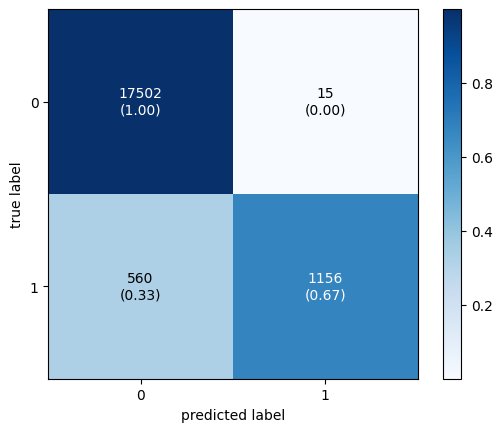

In [65]:
predicted = np.array(rounded)
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
plot_confusion_matrix(conf_mat=conf_mat, show_absolute=True,
show_normed=True, colorbar=True)
plt.show()

In [66]:
model.save("dia_model.h5")

In [67]:
import joblib

In [68]:
joblib.dump(sc, 'scaler.pkl') 

['scaler.pkl']

In [69]:
scale = joblib.load('scaler.pkl')